In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import itertools

# Preliminary data analysis

In [126]:
X, y = fetch_openml(name="pollen", return_X_y=True, parser='auto', version=1)

# dimension of the data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}", "\n")

# print a sample and label
print(f"example of sample: \n{X.iloc[0]}", "\n")
print(f"example of label: {y.iloc[0]}")

X shape: (3848, 4)
y shape: (3848,) 

example of sample: 
RIDGE     -2.3482
NUB        3.6314
CRACK      5.0289
WEIGHT    10.8721
Name: 0, dtype: float64 

example of label: -1.3852


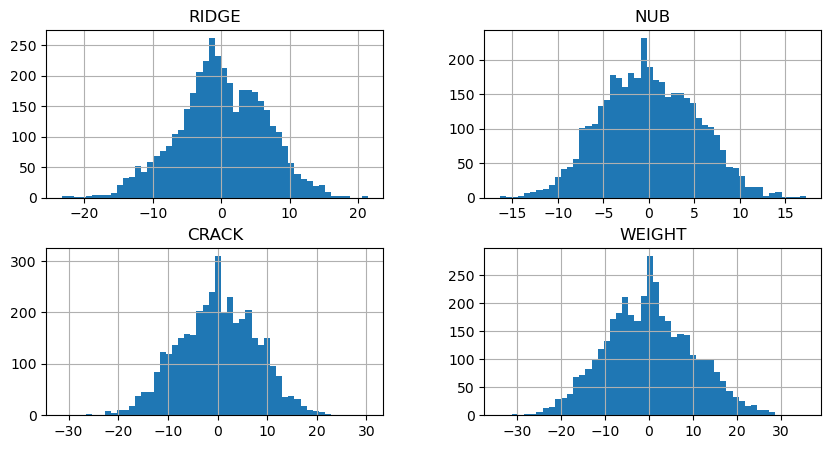

In [136]:
X.hist(bins=50, figsize=(10, 5))
plt.show()

### We can see how each colum values are spread

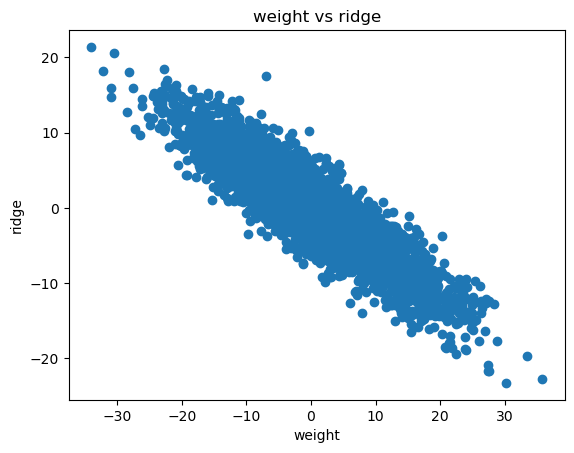

In [117]:
plt.scatter(X["WEIGHT"], X["RIDGE"])
plt.xlabel("weight")
plt.ylabel("ridge")
plt.title("weight vs ridge")
plt.show()

### By conducting a preliminary data analysis, we noticed that two feature columns have an opposite correlation, the other columns don't have a clear correlation.

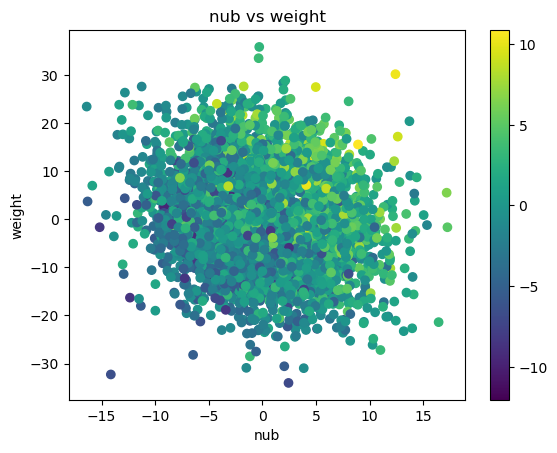

In [118]:
# plot a scatter plot of nub and weight and colour the points by the label
plt.scatter(X["NUB"], X["WEIGHT"], c=y)
plt.xlabel("nub")
plt.ylabel("weight")
plt.title("nub vs weight")
plt.colorbar()
plt.show()


### We can see some correlation between the 'weight' and 'nub' features values to the target value, on the upper right side the target values are higher and the bottom left side the target values are lower

# Linear regression for different train-test ratios

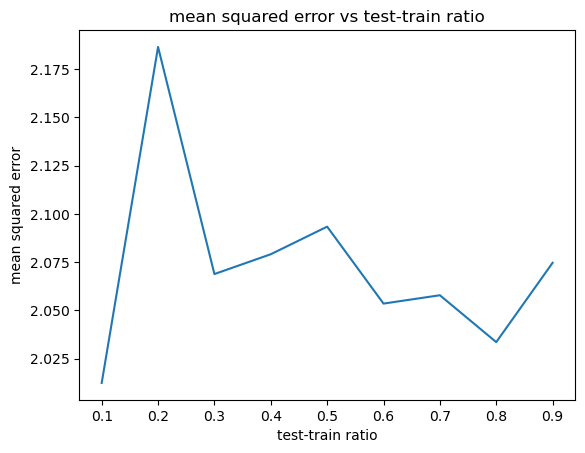

In [119]:
ratios = [0.1 * r for r in range(1, 10)]
accuracies = []
for r in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r, random_state=1)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    accuracies.append(mean_squared_error(y_test, y_pred))
plt.plot(ratios, accuracies)
plt.xlabel("test-train ratio")
plt.ylabel("mean squared error")
plt.title("mean squared error vs test-train ratio")
plt.show()

##### Since we are using MSE as the error metric, the lower the error the better the model. We get values that are relatively close to zero which is good.

# Finding the k best features

In [120]:
# a function that gets train-set, test-set and k and returns the k-features from the dataset that achieve the highest accuracy
def get_k_best_features(X_train, X_test, y_train, y_test, k):
    indices_accuracy_dict = {}
    # generate all subsets of k features
    for subset in itertools.combinations(X_train.columns, k):
        regressor = LinearRegression()
        regressor.fit(X_train[list(subset)], y_train)
        y_pred = regressor.predict(X_test[list(subset)])
        indices_accuracy_dict[subset] = mean_squared_error(y_test, y_pred)
    # return the subset and accuracy with the highest accuracy
    best_subset = min(indices_accuracy_dict, key=indices_accuracy_dict.get)
    return best_subset, indices_accuracy_dict[best_subset]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
best_subset, best_accuracy = get_k_best_features(X_train, X_test, y_train, y_test, 2)
print(f"best subset: {best_subset}, accuracy: {best_accuracy}")

best subset: ('RIDGE', 'WEIGHT'), accuracy: 3.429144601898424


In [122]:
best_subset, best_accuracy = get_k_best_features(X_train, X_test, y_train, y_test, 3)
print(f"best subset: {best_subset}, accuracy: {best_accuracy}")

best subset: ('RIDGE', 'NUB', 'WEIGHT'), accuracy: 2.206765870721761


### As expected from the scatter plot above the most significant features are 'WEIGHT' and 'NUB'